In [1]:
import torch 
import matplotlib.pyplot as plt 
import numpy as np 
from mpl_toolkits import mplot3d

In [2]:
torch.manual_seed(1) 

In [3]:
# Create some data 
X = torch.arange(-3, 3, 0.1).view(-1, 1)  # Basta daw reshape 
f = 1 * X - 1 
Y = f + 0.1 * torch.randn(X.size())

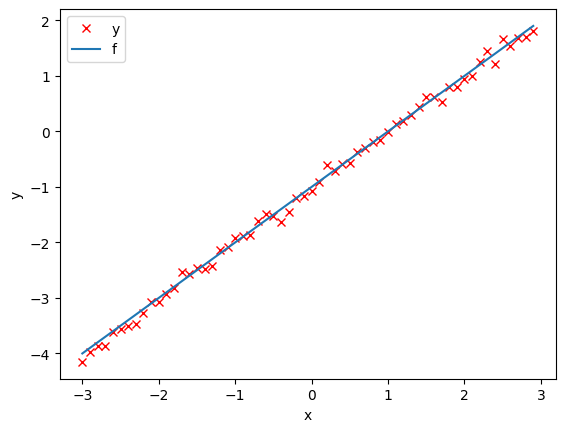

In [4]:
# Plot 
plt.plot(X.numpy(), Y.numpy(), 'rx', label='y') 
plt.plot(X.numpy(), f.numpy(), label='f') 
plt.ylabel('y')
plt.xlabel('x') 
plt.legend()
plt.show()

In [5]:
# Create model and cost function 
def forward(w, x, b): 
    return w * x + b 

# Define MSE 
def criterion(y_hat, y): 
    return torch.mean((y_hat - y) ** 2)
 

In [9]:
# PlotErrorSurfaces class 
class PlotErrorSurfaces(object):
    def __init__(self, w_range, b_range, X, Y, n_samples = 30, go = True): 
        W = np.linspace(-w_range, w_range, n_samples)
        B = np.linspace(-b_range, b_range, n_samples)
        w, b = np.meshgrid(W, B) 
        Z = np.zeros((30, 30)) 
        count_1 = 0 
        self.y = Y.numpy() 
        self.x = X.numpy() 
        for w1, b1 in zip(w, b): 
            count_2 = 0 
            for w2, b2 in zip(w1, b1): 
                Z[count_1, count_2] = np.mean((self.y - w2 * self.x + b2) ** 2) 
                count_2 += 1 
            count_1 += 1 

        self.Z = Z 
        self.w = w 
        self.b = b 
        self.W = []
        self.B = [] 
        self.LOSS = [] 
        self.n = 0 
        if go == True: 
            plt.figure() 
            plt.figure(figsize=(7.5, 5)) 
            plt.axes(projection='3d').plot_surface(self.w, self.b, self.Z, rstride=1, cstride=1, cmap='viridis', edgecolor='none') 
            plt.title('Loss Surface')
            plt.xlabel('w')
            plt.ylabel('b') 
            plt.show() 
            plt.figure() 
            plt.title('Loss Surface Contour') 
            plt.xlabel('w') 
            plt.ylabel('b') 
            plt.contour(self.w, self.b, self.Z) 
            plt.show()
    
    # Setter 
    def set_para_loss(self, W, B, loss): 
        self.n = self.n + 1
        self.W.append(W) 
        self.B.append(B) 
        self.LOSS.append(loss) 
    
    # Plot diagram 
    def final_plot(self): 
        ax = plt.axes(projection='3d') 
        ax.plot_wireframe(self.w, self.b, self.Z) 
        ax.scatter(self.W, self.B, self.LOSS, c='r', marker='x', s=200, alpha=1) 
        plt.figure()
        plt.contour(self.w, self.b, self.Z) 
        plt.scatter(self.W, self.B, c='r', marker='x') 
        plt.xlabel('w')
        plt.ylabel('b') 
        plt.show()

    # Plot diagram
    def plot_ps(self):
        plt.subplot(121)
        plt.ylim
        plt.plot(self.x, self.y, 'ro', label = "training points")
        plt.plot(self.x, self.W[-1] * self.x + self.B[-1], label = "estimated line")
        plt.xlabel('x')
        plt.ylabel('y')
        plt.ylim((-10, 15))
        plt.title('Data Space Iteration: ' + str(self.n))
        plt.subplot(122)
        plt.contour(self.w, self.b, self.Z)
        plt.scatter(self.W, self.B, c = 'r', marker = 'x')
        plt.title('Loss Surface Contour Iteration' + str(self.n))
        plt.xlabel('w')
        plt.ylabel('b')
        plt.show()

<Figure size 640x480 with 0 Axes>

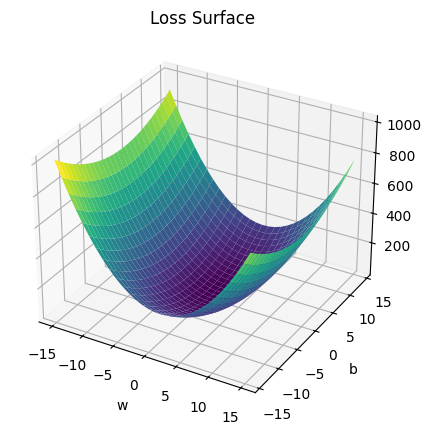

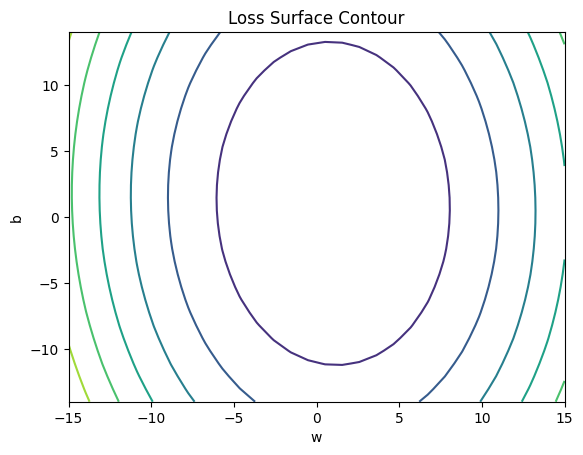

In [10]:
# Create plot 
get_surface = PlotErrorSurfaces(15, 14, X, Y, 30) 

In [11]:
# Train the model: Batch Gradient Descent 
# Define parameters w, b for y = wx + b 

w = torch.tensor(-15.0, requires_grad=True) 
b = torch.tensor(-10.0, requires_grad=True) 


In [13]:
# Set learning rate to 0.1, and LOSS as empty list 
learning_rate = 0.1 
LOSS_BGD = [] 

In [18]:
# Define train_model for training the model 
def train_model(num_epochs): 
    for epoch in range(num_epochs): 
        # Make prediction 
        y_hat = forward(w, X, b) 

        # Calcualte loss 
        loss = criterion(y_hat, Y) 

        # Section for plotting 
        get_surface.set_para_loss(w.data.tolist(), b.data.tolist(), loss.tolist()) 
        get_surface.plot_ps() 

        # Store the loss 
        LOSS_BGD.append(loss) 

        # Backpropagation 
        loss.backward() 

        # Update parameters slope and bias 
        w.data = w.data - learning_rate * w.grad.data 
        b.data = b.data - learning_rate * b.grad.data 

        # Zero the gradients 
        w.grad.data.zero_() 
        b.grad.data.zero_()

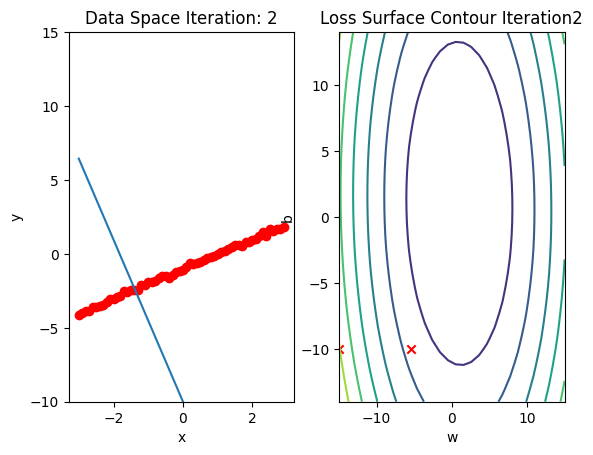

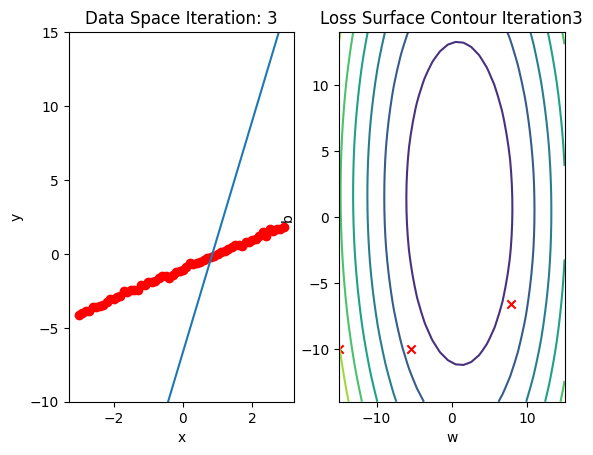

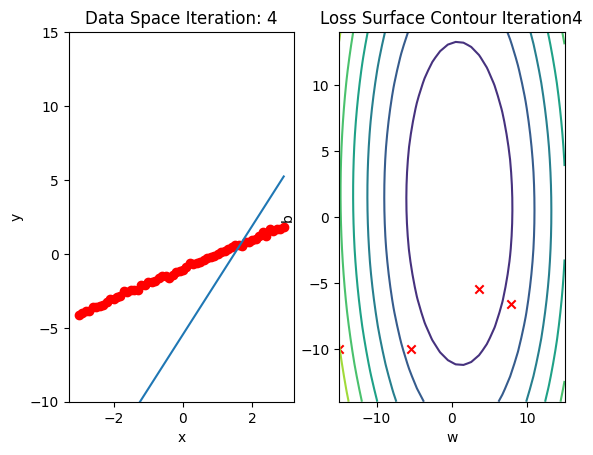

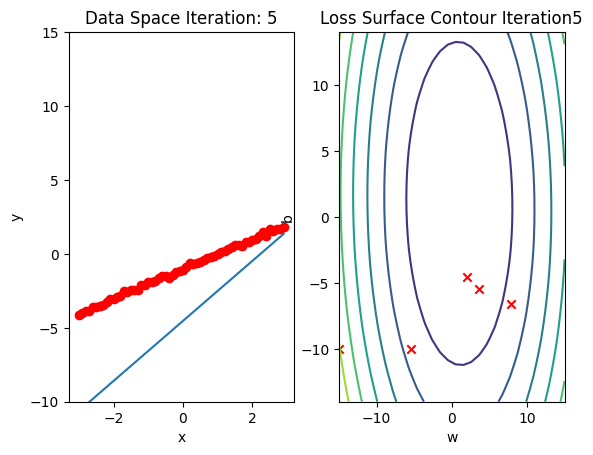

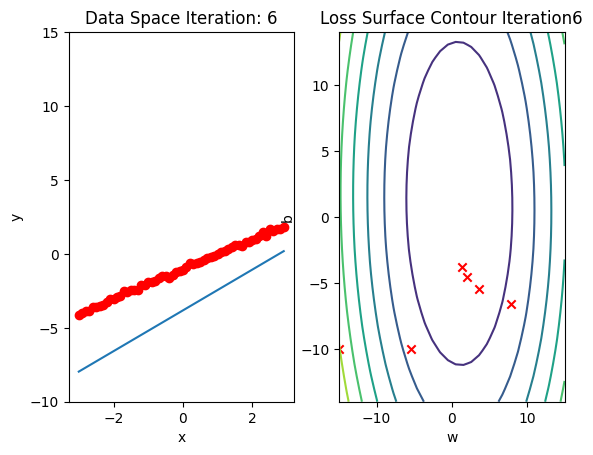

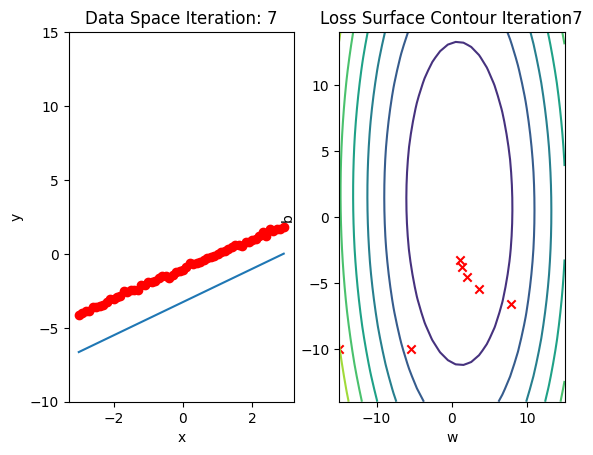

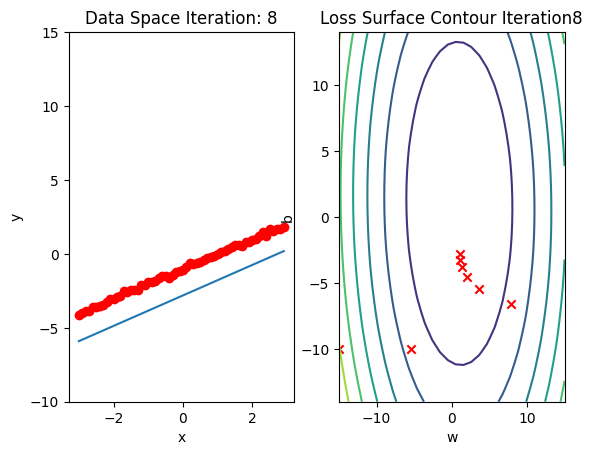

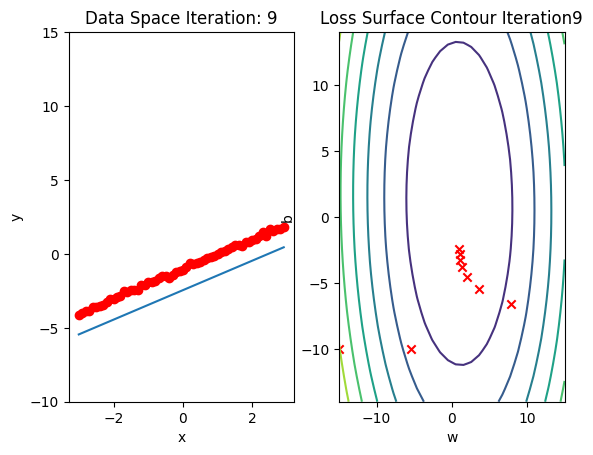

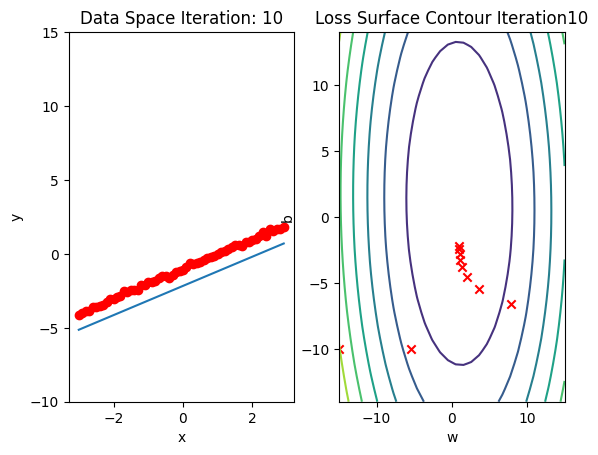

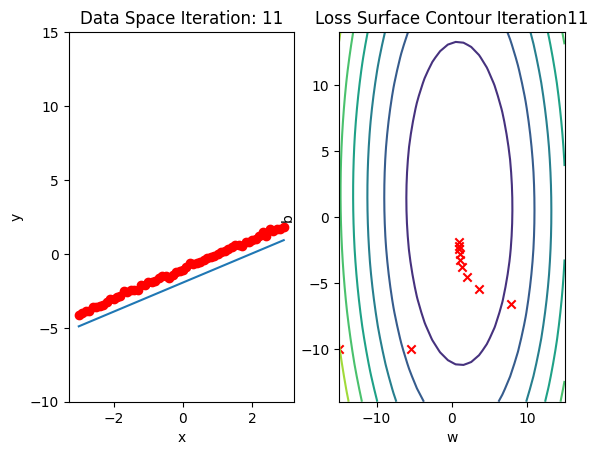

In [19]:
# Run 10 epochs 
train_model(10)

In [20]:
# Train Stochastic Gradient Descent 
get_surface_sgd = PlotErrorSurfaces(15, 13, X, Y, 30, go = False)

In [25]:
# Define train_model_sgd 
LOSS_SGD = [] 
w = torch.tensor(-15.0, requires_grad=True) 
b = torch.tensor(-10.0, requires_grad=True) 

# Do the same process 
def train_model_sgd(num_epochs: int): 
    for epoch in range(num_epochs): 
        Yhat = forward(w, X, b)
        LOSS_SGD.append(criterion(Yhat, Y).tolist())
        for x, y in zip(X, Y):
            yhat = forward(w, x, b) 
            loss = criterion(yhat, y)
            get_surface.set_para_loss(w.data.tolist(), b.data.tolist(), loss.tolist())
            loss.backward()
            w.data = w.data - learning_rate * w.grad.data
            b.data = b.data - learning_rate * b.grad.data
            w.grad.data.zero_()
            b.grad.data.zero_()
            
        #plot surface and data space after each epoch    
        get_surface.plot_ps()


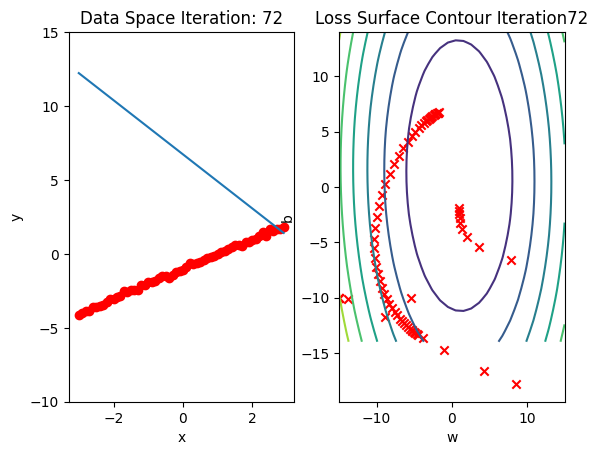

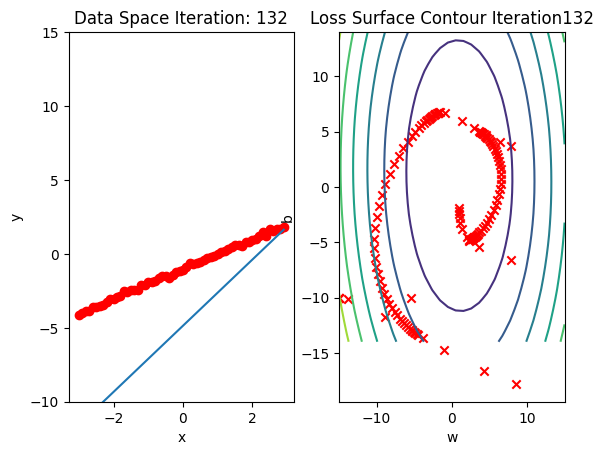

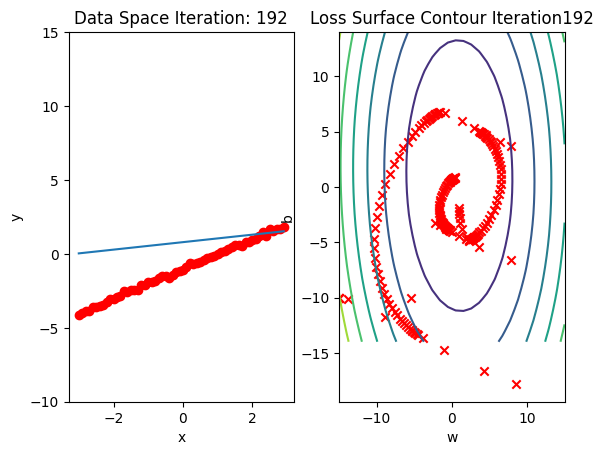

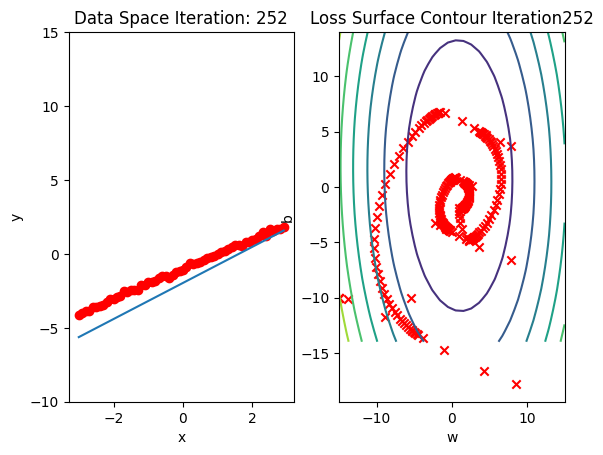

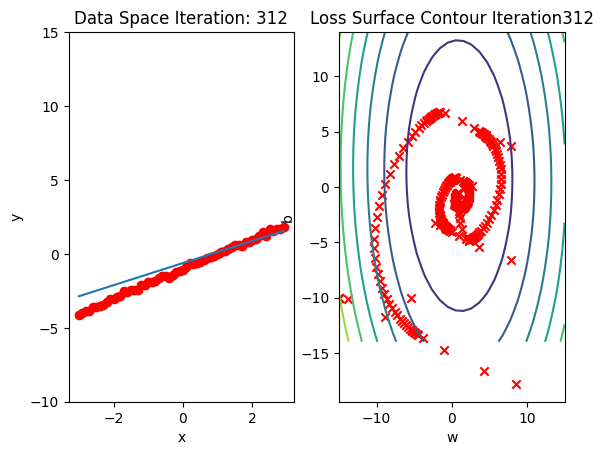

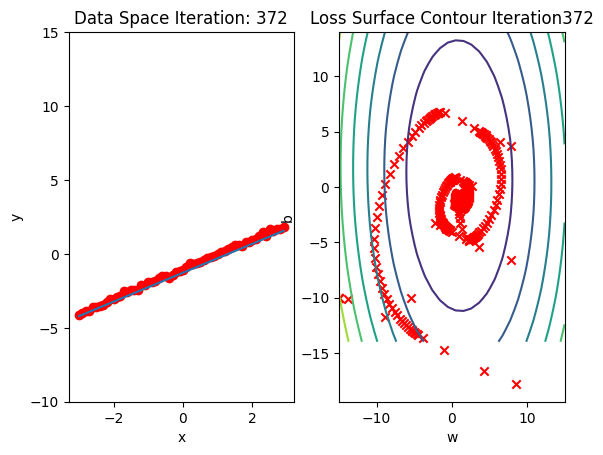

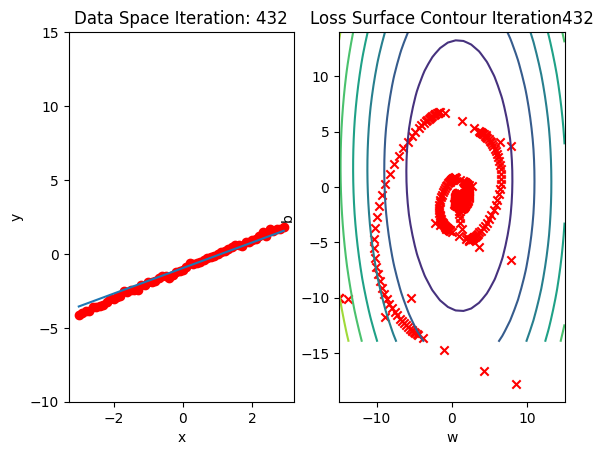

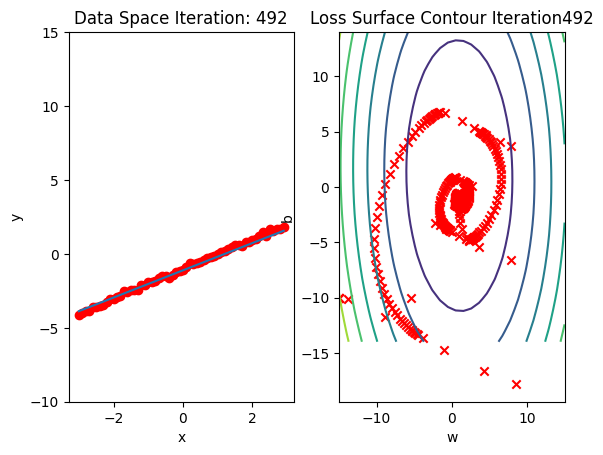

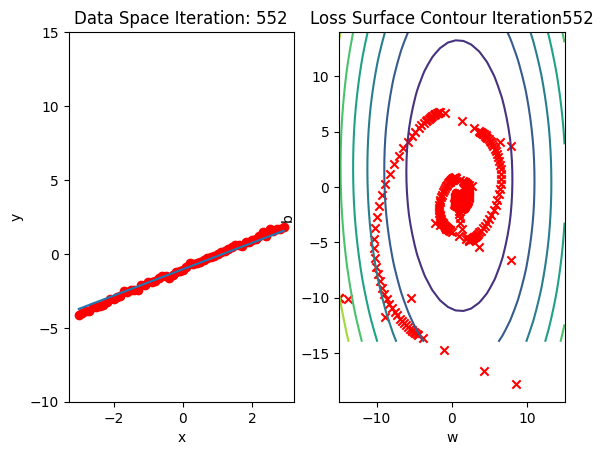

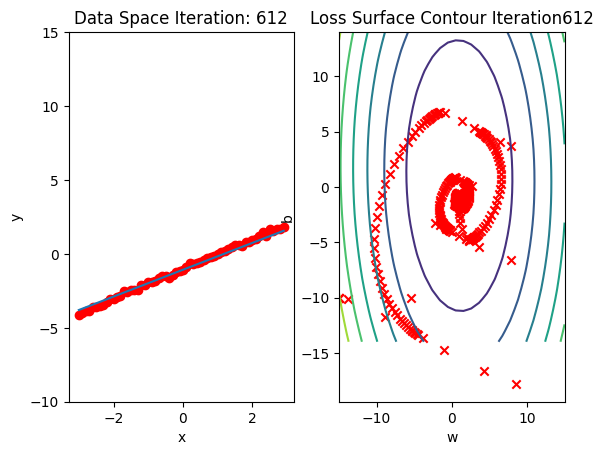

In [26]:
train_model_sgd(10)

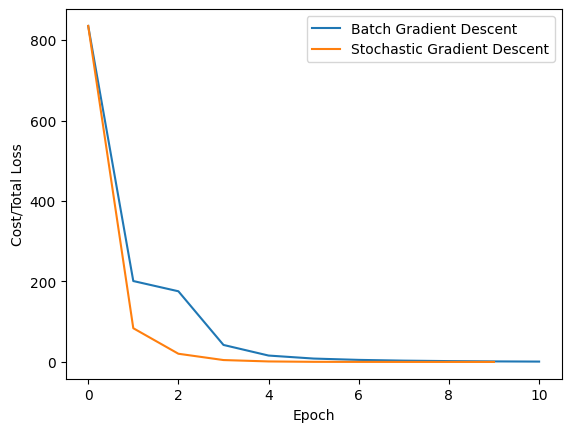

In [29]:
# Plot 
LOSS_BGD = [loss.detach() for loss in LOSS_BGD]
plt.plot(LOSS_BGD, label="Batch Gradient Descent") 
plt.plot(LOSS_SGD, label="Stochastic Gradient Descent") 
plt.xlabel("Epoch") 
plt.ylabel("Cost/Total Loss")
plt.legend() 
plt.show() 

In [31]:
# SGD with Dataset DataLoader 
from torch.utils.data import Dataset, DataLoader

In [32]:
# Create Dataset Class 
class Data(Dataset):
    def __init__(self): 
        self.x = torch.arange(-3, 3, 0.1).view(-1, 1) 
        self.y = 1 * self.x - 1 
        self.len = self.x.shape[0] 
    
    # Getter 
    def __getitem__(self, index):
        return self.x[index], self.y[index] 
    
    # Return the length 
    def __len__(self): 
        return self.len 


In [33]:
# Create the dataset object and check the length 
dataset = Data() 
print(f"Length: {len(dataset)}")

Length: 60


In [35]:
## Create plot_error_surfaces for viewing the data

get_surface = PlotErrorSurfaces(15, 13, X, Y, 30, go = False) 
train_loader = DataLoader(dataset=dataset, batch_size=1) 

In [44]:
# Train with dataloader 
w = torch.tensor(-15.0, requires_grad=True) 
b = torch.tensor(-10.0, requires_grad=True) 
LOSS_loader = [] 

def train_model_dataloader(num_epochs): 
    for epoch in range(num_epochs): 
        Yhat = forward(w, X, b)
        
        # store the loss 
        LOSS_loader.append(criterion(Yhat, Y).tolist())
        
        for x, y in train_loader:
            
            # make a prediction
            yhat = forward(w, x, b)
            
            # calculate the loss
            loss = criterion(yhat, y)
            
            # Section for plotting
            get_surface.set_para_loss(w.data.tolist(), b.data.tolist(), loss.tolist())
            
            # Backward pass: compute gradient of the loss with respect to all the learnable parameters
            loss.backward()
            
            
            w.data = w.data - learning_rate * w.grad.data
            b.data = b.data - learning_rate * b.grad.data
            
            w.grad.data.zero_()
            b.grad.data.zero_()
            
        #plot surface and data space after each epoch    
        get_surface.plot_ps()

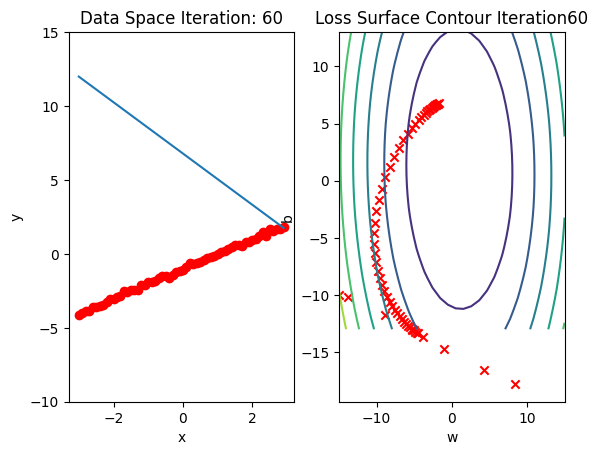

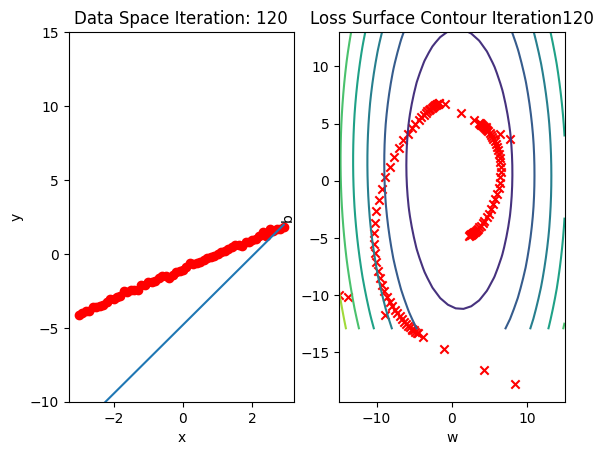

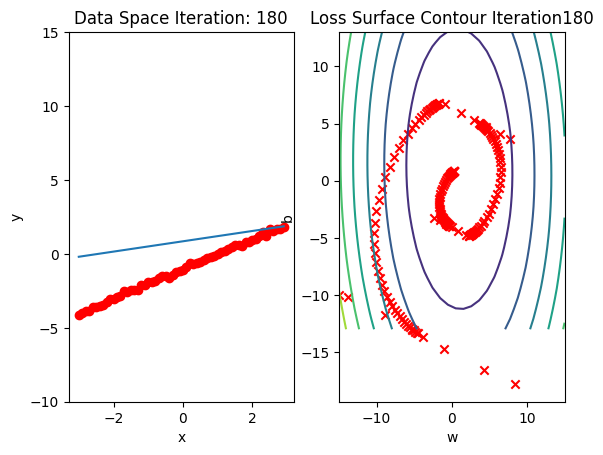

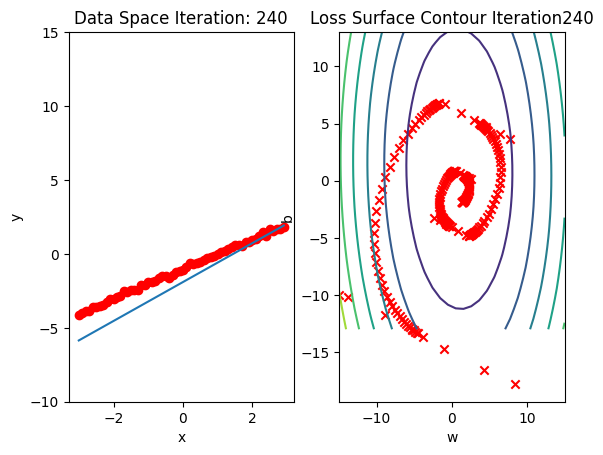

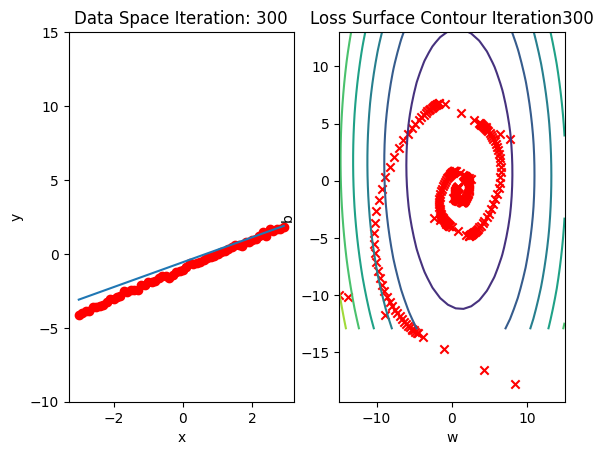

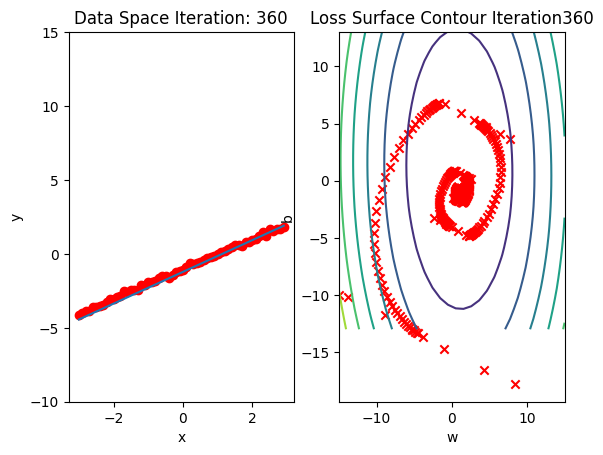

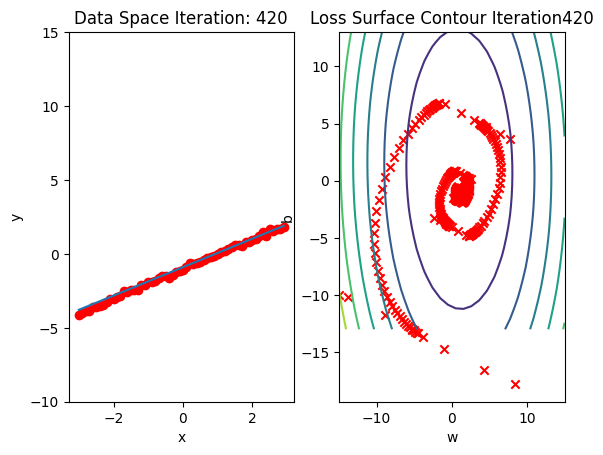

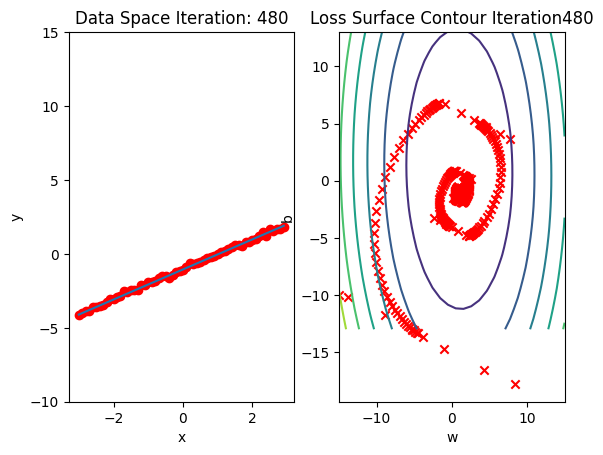

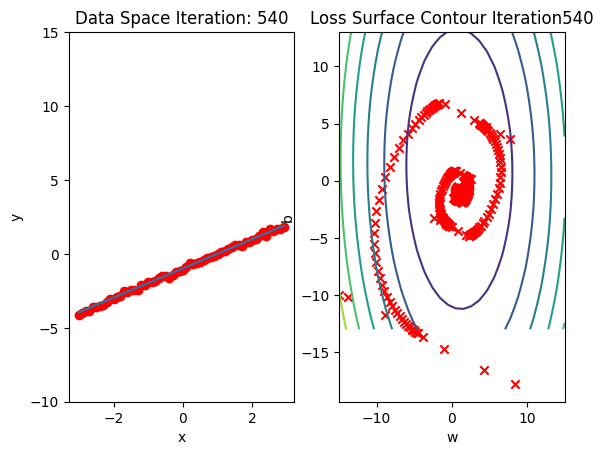

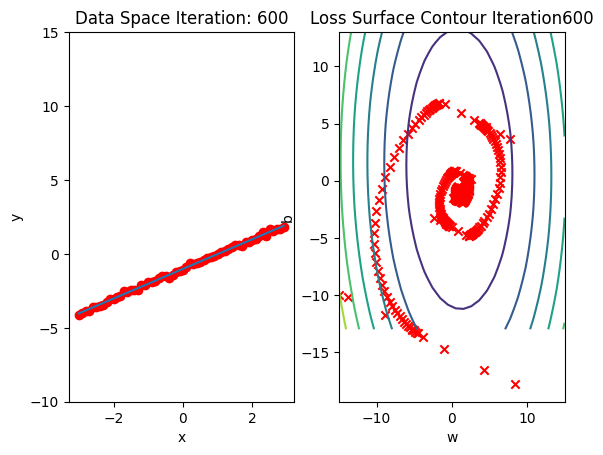

In [45]:
train_model_dataloader(10)

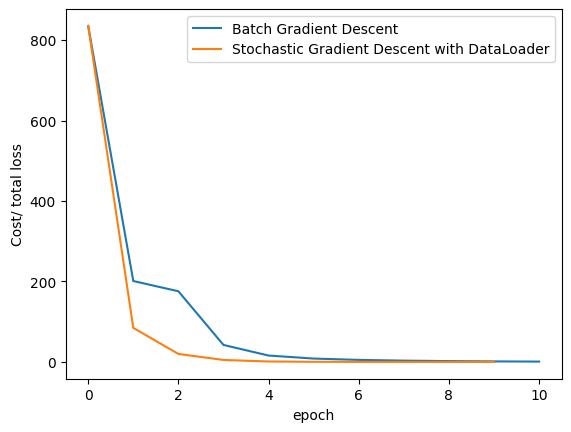

In [46]:
# Plot the LOSS_BGD and LOSS_Loader

plt.plot(LOSS_BGD,label="Batch Gradient Descent")
plt.plot(LOSS_loader,label="Stochastic Gradient Descent with DataLoader")
plt.xlabel('epoch')
plt.ylabel('Cost/ total loss')
plt.legend()
plt.show()